Premer grafa: 3
Iteracija: 1


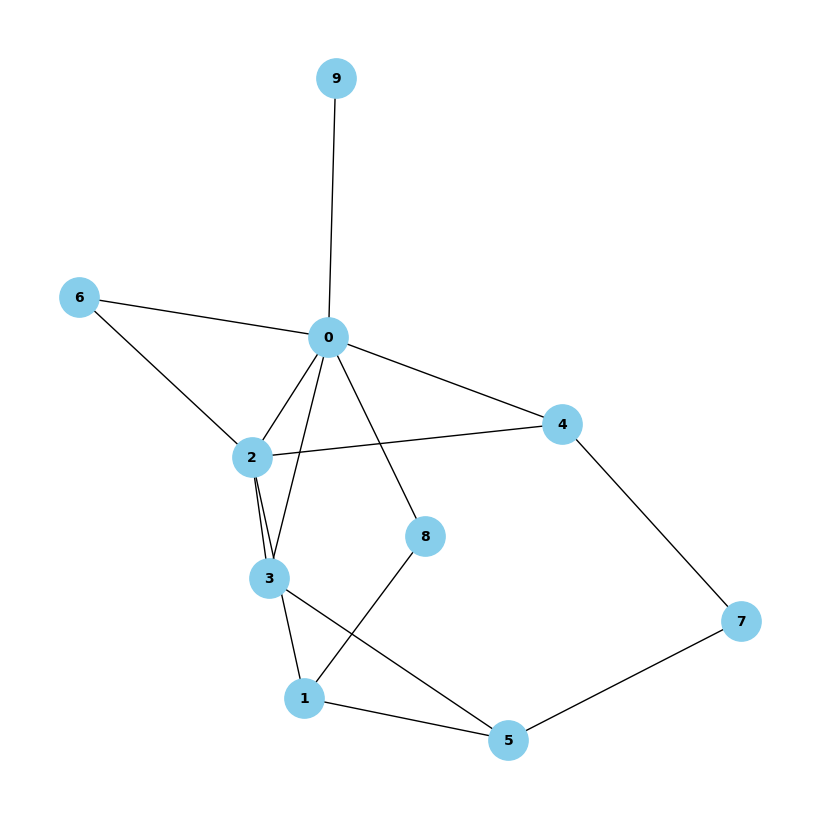

Premer zadnjega grafa: 3


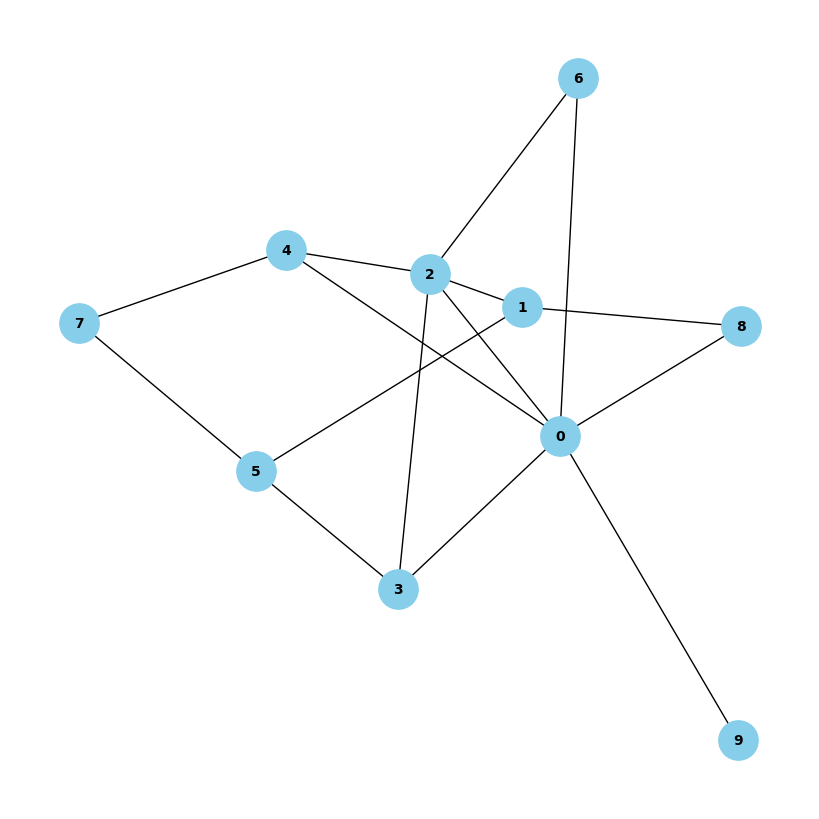

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random


def nakljucni_zacetni_graf(n, e):
    # Create an initial random graph with the specified number of nodes
    G = nx.gnm_random_graph(n, e)
    # Ensure the graph is connected
    while not nx.is_connected(G):
        G = nx.gnm_random_graph(n, e)
    return G


def vsota_razdalj(graf, vozlisce):
    vsota = 0
    for v in graf.nodes - {vozlisce}:
        vsota += nx.shortest_path_length(graf, vozlisce, v)
    return vsota


def iskanje_ravnotezja(n, e, max_iteracij):
    trenutna_resitev = nakljucni_zacetni_graf(n, e)
    for iteracija in range(max_iteracij):
        vozlisce1 = random.choice(list(trenutna_resitev.nodes))
        # Odstrani nakljucno povezavo prvega vozlisca
        povezave_vozlisca1 = list(trenutna_resitev.edges(vozlisce1))
        nakljucna_povezava = random.choice(povezave_vozlisca1)
        nova_resitev = trenutna_resitev.copy()
        nova_resitev.remove_edge(*nakljucna_povezava)
        # Izbere nakljucno drugo vozlisce in ga poveze z prvim
        vozlisce2 = random.choice(list(trenutna_resitev.nodes - set([vozlisce1])))
        nova_resitev.add_edge(vozlisce1, vozlisce2) 
        # Preveri ali je nova rešitev boljša za vozlišče 1, če je posodobi trenutno rešitev
        if nx.is_connected(nova_resitev):
            if vsota_razdalj(trenutna_resitev, vozlisce1) > vsota_razdalj(nova_resitev, vozlisce1):
                trenutna_resitev = nova_resitev.copy()
                print(f"Premer grafa: {nx.diameter(trenutna_resitev)}")
                print(f"Iteracija: {iteracija}")
                plt.figure(figsize=(8, 8))
                nx.draw(trenutna_resitev, with_labels=True, font_weight='bold', node_color='skyblue', node_size=800, font_size=10)
                plt.show()
    return trenutna_resitev


st_vozlisc = 10
max_iteracij = 10
st_povezav = 15

zadnji_graf = iskanje_ravnotezja(st_vozlisc, st_povezav, max_iteracij)
print(f"Premer zadnjega grafa: {nx.diameter(zadnji_graf)}")


plt.figure(figsize=(8, 8))
nx.draw(zadnji_graf, with_labels=True, font_weight='bold', node_color='skyblue', node_size=800, font_size=10)
plt.show()

Premer grafa: 4
Iteracija: 2
Graf je drevo, ni pa v sum ravnovesju


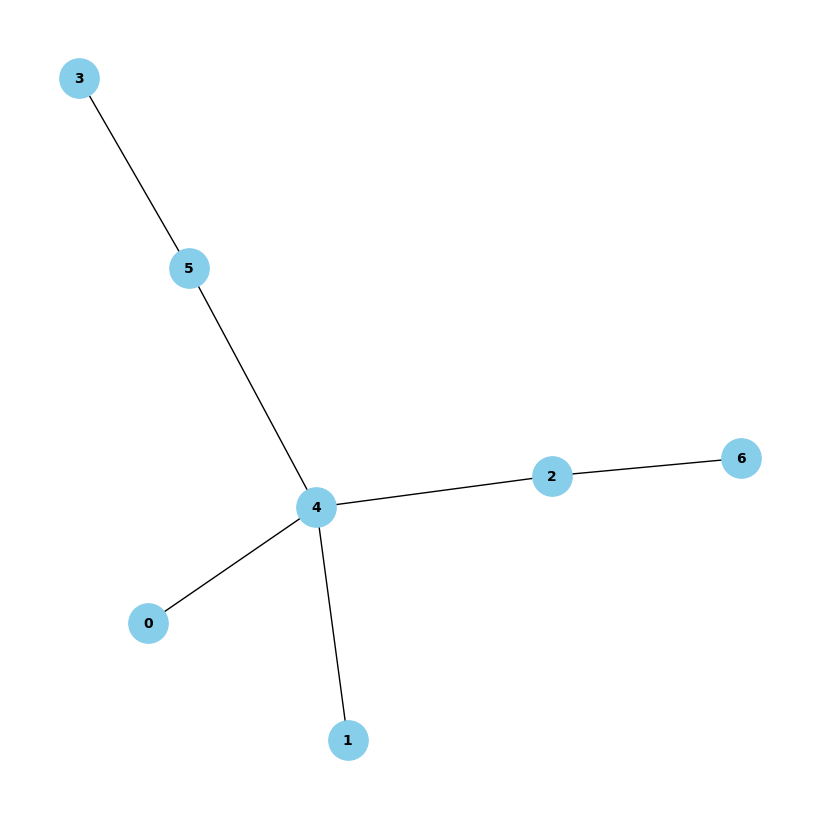

Premer grafa: 3
Iteracija: 20
Graf je drevo, ni pa v sum ravnovesju


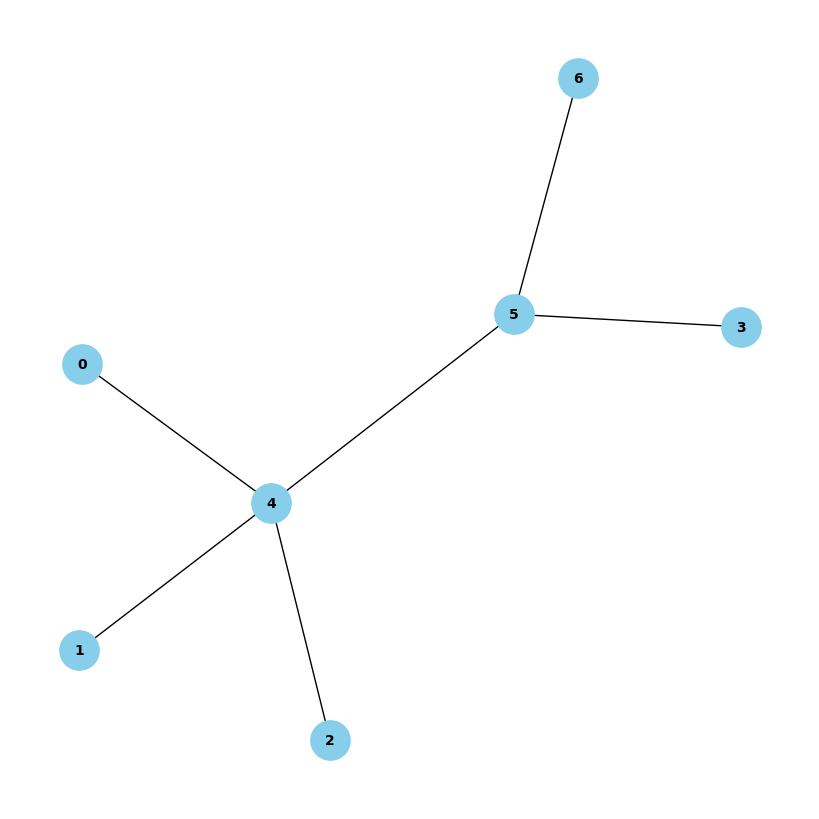

Premer grafa: 3
Iteracija: 30
Graf je drevo, ni pa v sum ravnovesju


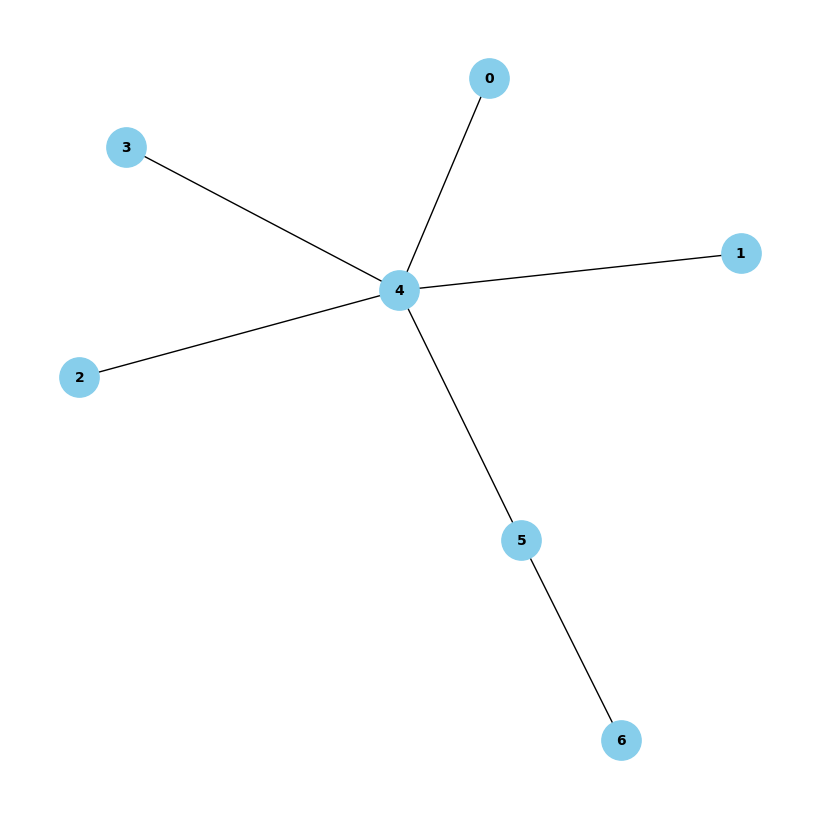

Premer grafa: 2
Iteracija: 35
Graf je drevo(zvezda) v sum ravnovesju


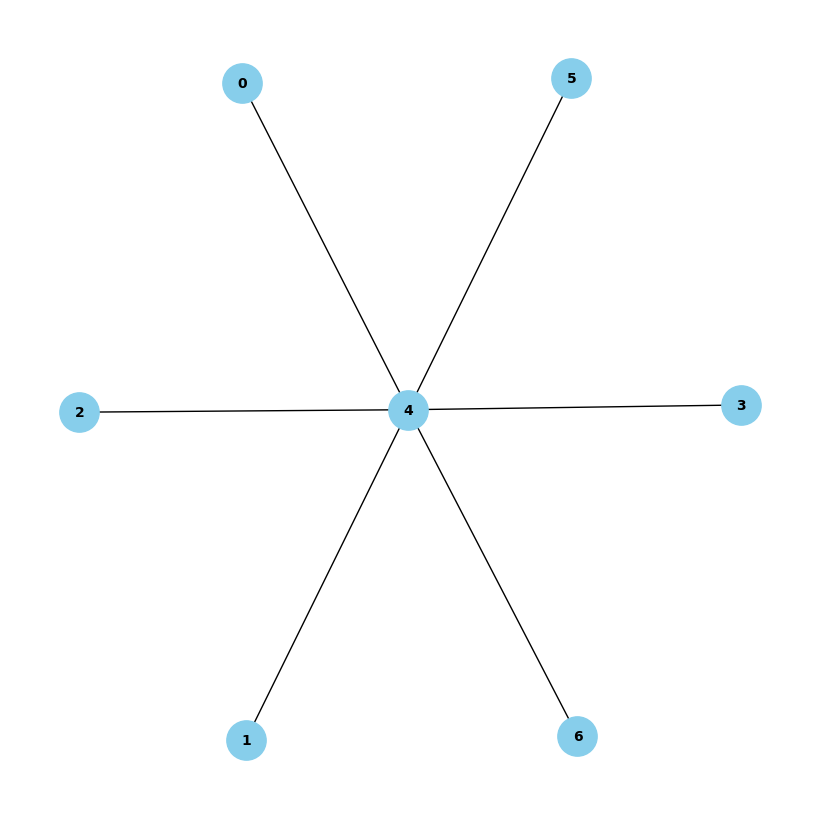

Premer zadnjega grafa: 2
Graf je drevo(zvezda) v sum ravnovesju


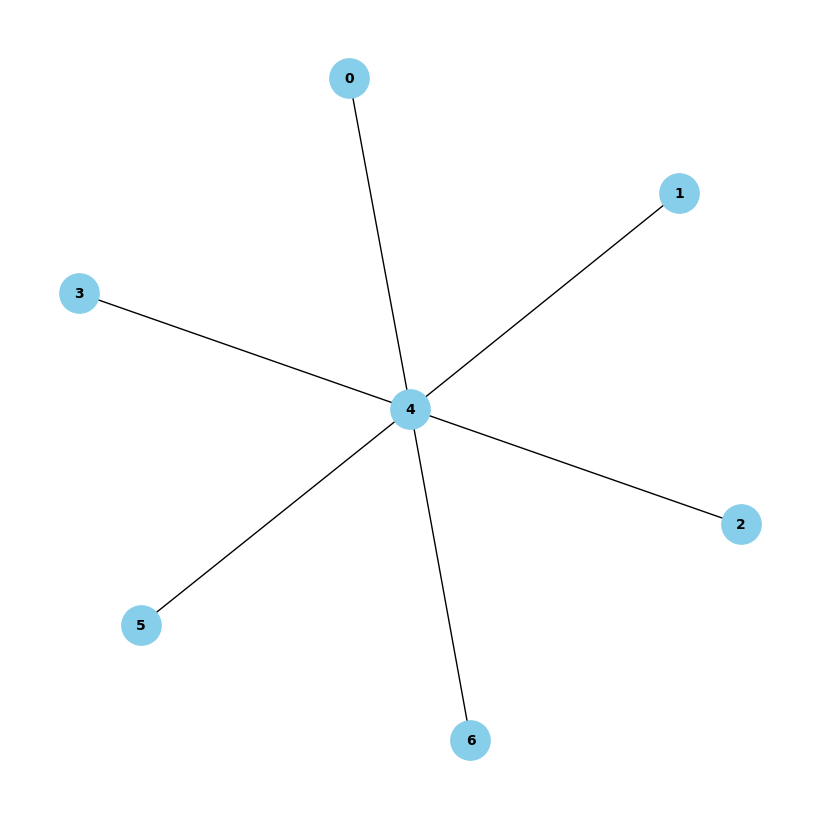

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random


def swap_equilibrium_sum_drevo(graf):
    if not nx.is_connected(graf):
        return 'Graf ni povezan in torej ni drevo v sum ravnovesju'
    elif len(graf.edges) == graf.number_of_nodes() - 1:
        if nx.diameter(graf) > 2:
            return 'Graf je drevo, ni pa v sum ravnovesju'
        elif nx.diameter(graf) == 2:
            return 'Graf je drevo(zvezda) v sum ravnovesju'
        else:
            return 'Graf je ?'
    else:
        return 'Graf ni drevo'


def iskanje_ravnotezja_drevo(n, max_iteracij):
    trenutna_resitev = nx.random_tree(n)
    for iteracija in range(max_iteracij):
        vozlisce1 = random.choice(list(trenutna_resitev.nodes))
        # Odstrani nakljucno povezavo prvega vozlisca
        povezave_vozlisca1 = list(trenutna_resitev.edges(vozlisce1))
        nakljucna_povezava = random.choice(povezave_vozlisca1)
        nova_resitev = trenutna_resitev.copy()
        nova_resitev.remove_edge(*nakljucna_povezava)
        # Izbere nakljucno drugo vozlisce in ga poveze z prvim
        vozlisce2 = random.choice(list(trenutna_resitev.nodes - set([vozlisce1])))
        nova_resitev.add_edge(vozlisce1, vozlisce2) 
        # Preveri ali je nova rešitev boljša za vozlišče 1, če je posodobi trenutno rešitev
        if nx.is_connected(nova_resitev):
            if vsota_razdalj(trenutna_resitev, vozlisce1) > vsota_razdalj(nova_resitev, vozlisce1):
                trenutna_resitev = nova_resitev.copy()
                print(f"Premer grafa: {nx.diameter(trenutna_resitev)}")
                print(f"Iteracija: {iteracija}")
                print(f"{swap_equilibrium_sum_drevo(trenutna_resitev)}")
                plt.figure(figsize=(8, 8))
                nx.draw(trenutna_resitev, with_labels=True, font_weight='bold', node_color='skyblue', node_size=800, font_size=10)
                plt.show()
    return trenutna_resitev


st_vozlisc = 7
max_iteracij = 100


zadnji_graf = iskanje_ravnotezja_drevo(st_vozlisc, max_iteracij)
print(f"Premer zadnjega grafa: {nx.diameter(zadnji_graf)}")
print(f"{swap_equilibrium_sum_drevo(zadnji_graf)}")

plt.figure(figsize=(8, 8))
nx.draw(zadnji_graf, with_labels=True, font_weight='bold', node_color='skyblue', node_size=800, font_size=10)
plt.show()

In [3]:
def potratno_ravnovesje_sum(graf):
    for v1 in graf.nodes:
        for p in list(graf.edges(v1)):
            for v2 in graf.nodes - {v1}:
                testni_graf = graf.copy()
                testni_graf.remove_edge(*p)
                testni_graf.add_edge(v1, v2)
                if nx.is_connected(testni_graf):
                    if vsota_razdalj(graf, v1) > vsota_razdalj(testni_graf, v1):
                        return f"Ni sum ravnovesje, vozlišču {v1} se splača zamenjati povezavo {p} z povezavo {v1, v2}"
    return 'Je ravnovesje'

potratno_ravnovesje_sum(zadnji_graf)


'Je ravnovesje'